In [1]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\dell/.cache\torch\hub\master.zip


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  2.4s, installed 1 package: ['gitpython>=3.1.30']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2024-10-19 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

100%|██████████| 14.1M/14.1M [00:03<00:00, 4.87MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\dell/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 886x612 1 person, 1 bottle, 1 laptop
Speed: 13.5ms pre-process, 57.1ms inference, 114.4ms NMS per image at shape (1, 3, 640, 448)


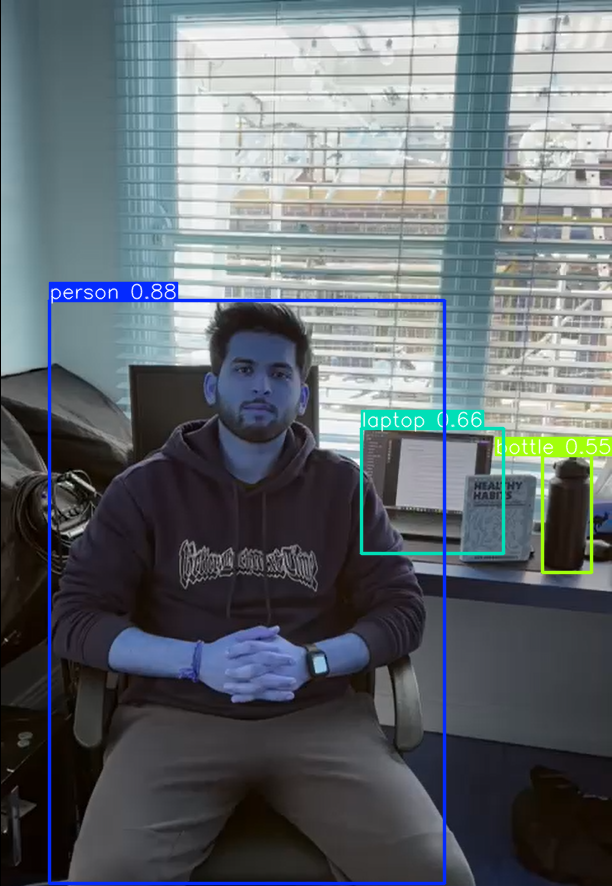

         xmin        ymin        xmax        ymax  confidence  class    name
0   49.328499  300.991364  444.605957  883.062500    0.883217      0  person
1  361.004791  428.164673  503.095459  553.110779    0.658023     63  laptop
2  542.727112  455.657501  591.275696  572.198730    0.548209     39  bottle


In [2]:
import torch
import cv2
import matplotlib.pyplot as plt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # YOLOv8s

# Load the image
image_path = 'test_image.png' 
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Display detected objects and information
results.print()  
results.show() 

detections = results.pandas().xyxy[0]
print(detections)

# Convert BGR image (OpenCV format) to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the original image with detections
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
